<a href="https://colab.research.google.com/github/juanitoeldesastre/seminario1/blob/main/semi_evo_matricula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

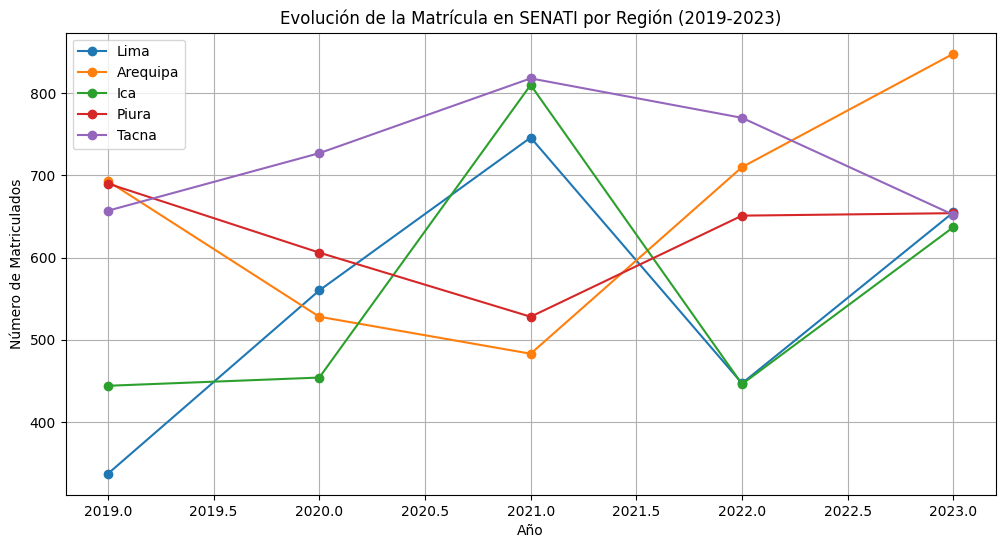

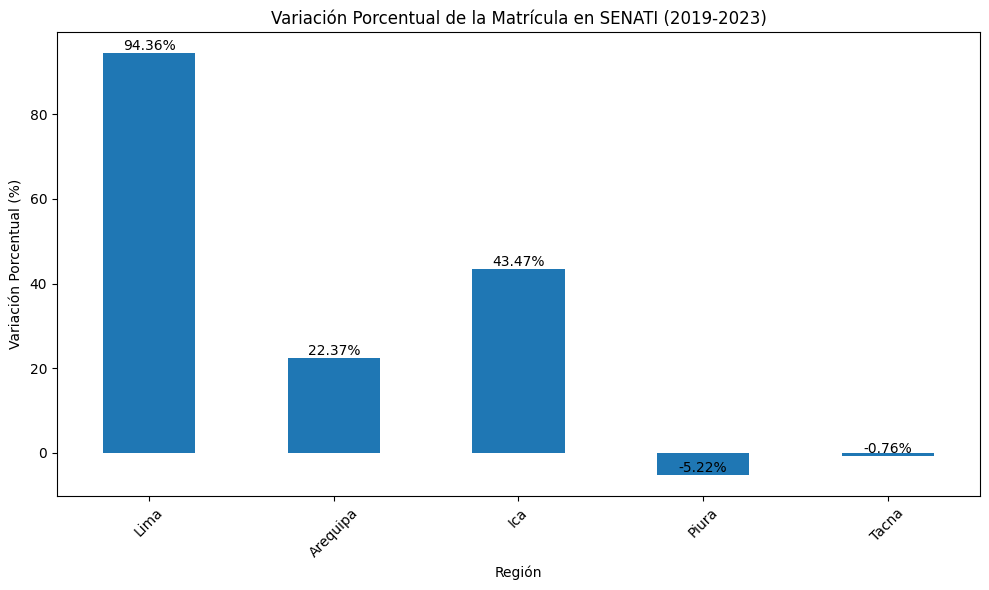

    Año   Lima  Arequipa    Ica  Piura  Tacna
0  2019  337.0     693.0  444.0  690.0  657.0
1  2020  560.0     528.0  454.0  606.0  727.0
2  2021  746.0     483.0  810.0  528.0  818.0
3  2022  447.0     710.0  446.0  651.0  770.0
4  2023  655.0     848.0  637.0  654.0  652.0

Variación porcentual:
Lima        94.36
Arequipa    22.37
Ica         43.47
Piura       -5.22
Tacna       -0.76
dtype: float64


In [29]:
#EJERCICIO INDIVIDUAL - TIEMPO 10

'''ANALIZAR LA EVOLUCION DE LA MATRICULA EN SENATI EN LAS REGIONES DEL PERU
ENTRE LOS AÑOS 2019 Y 2023, USAR UN GRAFICO DE LINEAS PARA MOSTRAR LA MATRICULA
POR CADA REGION Y GRAFICA DE BARRAS PARA LA VARIACION PORCENTUAL.
INVESTIGA DATOS REALES O CERCA, O SINO RANDOM QUE REPRESENTEN ADECUADAMENTE
LA REALIDAD DE CADA DEPARTAMENTO

1.CREAR UN GRAFICO DE LINEA QUE MUESTRE LA EVOLUCION DE LA MATRICULA EN AL MENOS
5 REGIONES DE PERU

2. CREAR UN GRAFICO DE BARRAS QUE MUESTRE LA VARIACION PORCENTUAL DE LA MATRICULA
ENTRE LOS AÑOS 2019 Y 2023

3. EXPONERLO

4. COMPARTIR LA CONCLUSION FINAL CON OTRO COMPAÑERO - DEBATIR
'''

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Generar datos simulados
np.random.seed(1)
years = range(2019, 2024)
regions = ['Lima', 'Arequipa', 'Ica', 'Piura', 'Tacna']

data = {
    'Año': years,
    **{region: np.random.randint(300, 800, size=5) + np.linspace(0, 100, 5) for region in regions}
}

df = pd.DataFrame(data)

# 1. Gráfico de líneas para la evolución de la matrícula
plt.figure(figsize=(12, 6))
for region in regions:
    plt.plot(df['Año'], df[region], marker='o', label=region)

plt.title('Evolución de la Matrícula en SENATI por Región (2019-2023)')
plt.xlabel('Año')
plt.ylabel('Número de Matriculados')
plt.legend()
plt.grid(True)
plt.show()

# 2. Gráfico de barras para la variación porcentual
variation = ((df.iloc[-1, 1:] - df.iloc[0, 1:]) / df.iloc[0, 1:] * 100).round(2)

plt.figure(figsize=(10, 6))
variation.plot(kind='bar')
plt.title('Variación Porcentual de la Matrícula en SENATI (2019-2023)')
plt.xlabel('Región')
plt.ylabel('Variación Porcentual (%)')
plt.xticks(rotation=45)
for i, v in enumerate(variation):
    plt.text(i, v, f'{v}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Imprimir datos para referencia
print(df)
print("\nVariación porcentual:")
print(variation)

<ipython-input-30-97f9e3a8ed75>:8: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  años = pd.date_range(start=inicio, end=fin, freq='AS-JAN')  # AS-JAN para el 1 de enero de cada año


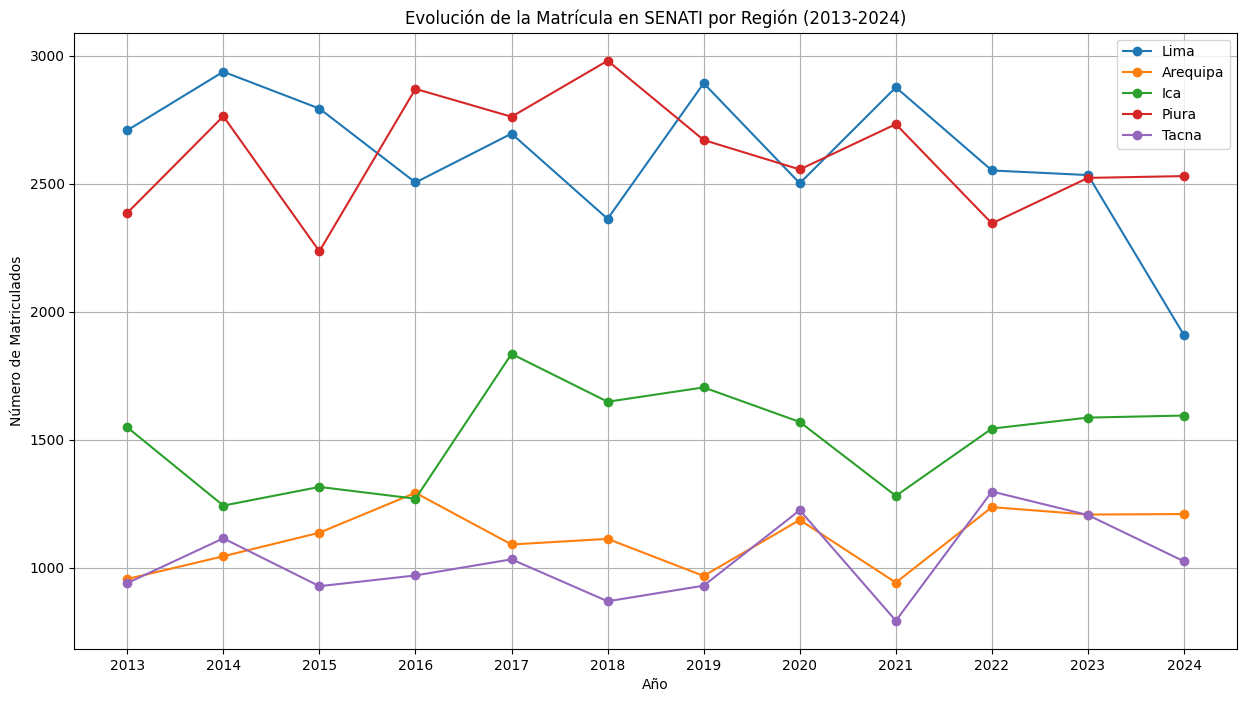

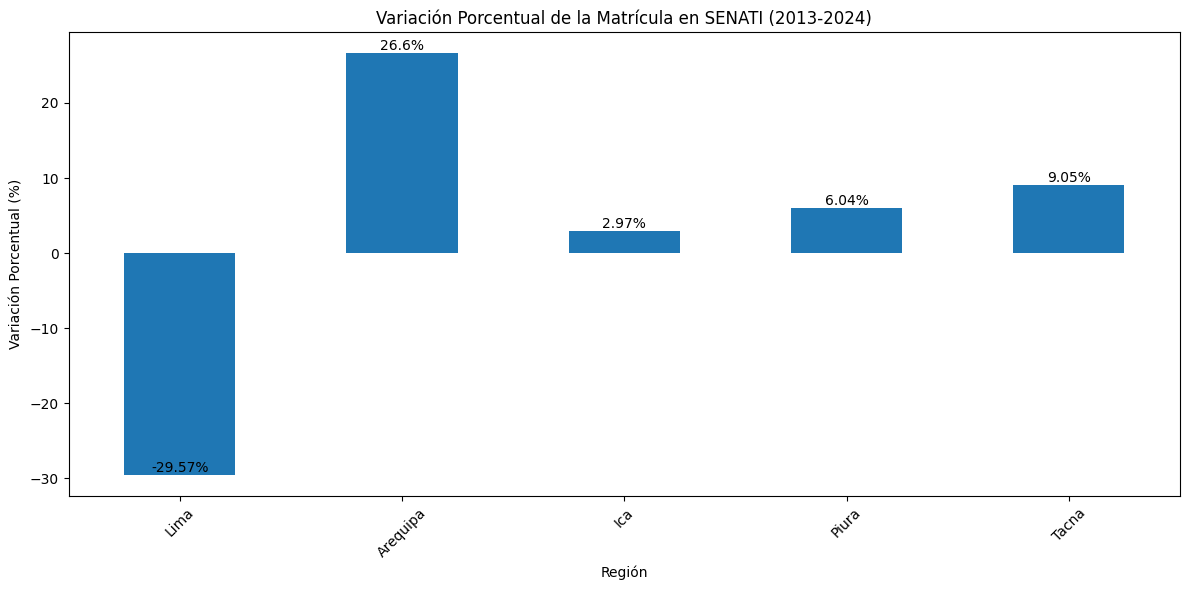

Datos totales por región:
            Lima  Arequipa   Ica  Piura  Tacna
Años                                          
2013-01-01  2709       955  1548   2386    939
2014-01-01  2938      1044  1242   2764   1114
2015-01-01  2794      1136  1315   2236    927
2016-01-01  2505      1292  1269   2871    969
2017-01-01  2696      1090  1835   2762   1032
2018-01-01  2363      1112  1648   2981    868
2019-01-01  2893       967  1704   2671    929
2020-01-01  2502      1186  1569   2556   1224
2021-01-01  2877       941  1280   2733    792
2022-01-01  2552      1236  1543   2345   1297
2023-01-01  2534      1207  1586   2523   1205
2024-01-01  1908      1209  1594   2530   1024

Variación porcentual por región:
Lima       -29.57
Arequipa    26.60
Ica          2.97
Piura        6.04
Tacna        9.05
dtype: float64


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

def generar_datos(departamento, sedes, inicio, fin):
    años = pd.date_range(start=inicio, end=fin, freq='AS-JAN')  # AS-JAN para el 1 de enero de cada año
    datos = pd.DataFrame({
        'Años': años,
        **{sede: np.random.randint(344, 692, size=len(años)) for sede in sedes}
    })
    datos.set_index('Años', inplace=True)
    return datos

# Definir regiones y sedes
regiones = {
    'Lima': ['Villa el Salvador', 'Surco', 'La Victoria', 'Centro', 'Independencia'],
    'Arequipa': ['Ilo', 'Arequipa'],
    'Ica': ['Chincha Alta', 'Pisco', 'Ica'],
    'Piura': ['Talara', 'Suliana', 'Piura', 'Paita', 'Sechura'],
    'Tacna': ['Baquijano y Carrillo', 'Bolivar']
}

# Generar y almacenar datos
datos_regiones = {}
for departamento, sedes in regiones.items():
    datos_regiones[departamento] = generar_datos(departamento, sedes, '2013-01-01', '2024-01-01')

# Calcular total por región
totales_regiones = {region: datos.sum(axis=1) for region, datos in datos_regiones.items()}
df_totales = pd.DataFrame(totales_regiones)

# Gráfico de líneas para la evolución de la matrícula
plt.figure(figsize=(15, 8))
for region in df_totales.columns:
    plt.plot(df_totales.index.year, df_totales[region], marker='o', label=region)

plt.title('Evolución de la Matrícula en SENATI por Región (2013-2024)')
plt.xlabel('Año')
plt.ylabel('Número de Matriculados')
plt.legend()
plt.grid(True)
plt.xticks(range(2013, 2025))
plt.show()

# Calcular y graficar variación porcentual
variacion = ((df_totales.iloc[-1] - df_totales.iloc[0]) / df_totales.iloc[0] * 100).round(2)

plt.figure(figsize=(12, 6))
variacion.plot(kind='bar')
plt.title('Variación Porcentual de la Matrícula en SENATI (2013-2024)')
plt.xlabel('Región')
plt.ylabel('Variación Porcentual (%)')
plt.xticks(rotation=45)
for i, v in enumerate(variacion):
    plt.text(i, v, f'{v}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Imprimir datos para referencia
print("Datos totales por región:")
print(df_totales)
print("\nVariación porcentual por región:")
print(variacion)

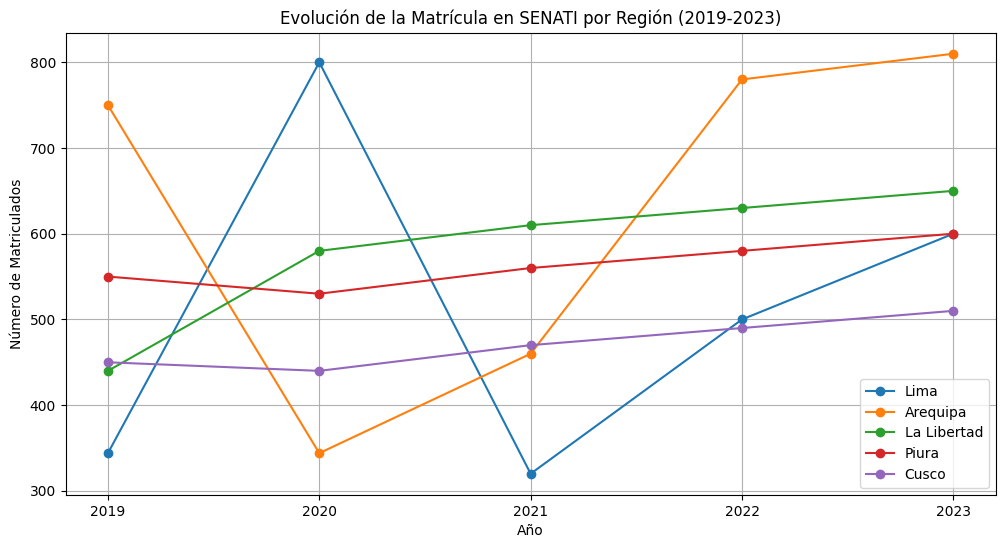

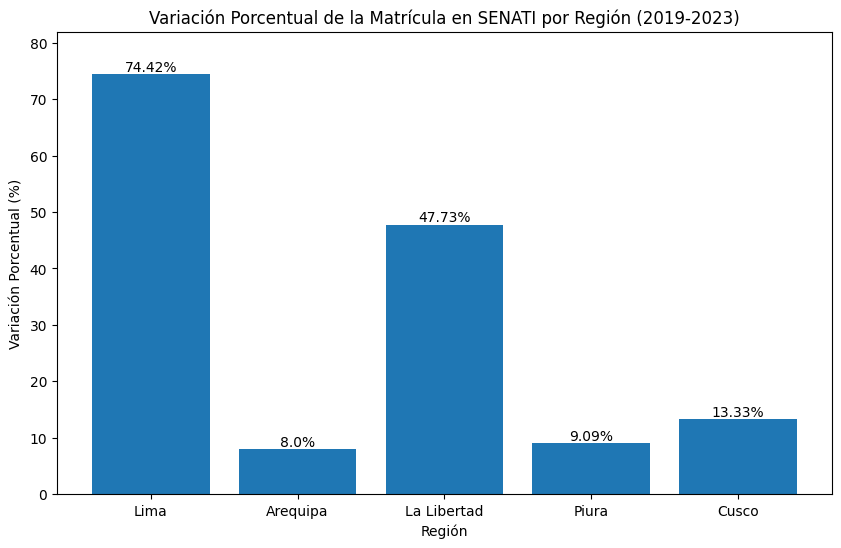

Gráficos generados: 'evolucion_matricula_senati.png' y 'variacion_porcentual_matricula_senati.png'


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos inventados de matrícula en SENATI por región (2019-2023)
data = {
    'Region': ['Lima', 'Arequipa', 'La Libertad', 'Piura', 'Cusco'],
    '2019': [344, 750, 440, 550, 450],
    '2020': [800, 344, 580, 530, 440],
    '2021': [320, 460, 610, 560, 470],
    '2022': [500, 780, 630, 580, 490],
    '2023': [600, 810, 650, 600, 510]
}

# Crear DataFrame
df = pd.DataFrame(data)

# 1. Gráfico de líneas para mostrar la evolución de la matrícula
plt.figure(figsize=(12, 6))
for region in df['Region']:
    plt.plot(df.columns[1:], df[df['Region'] == region].iloc[:, 1:].values[0], marker='o', label=region)

plt.title('Evolución de la Matrícula en SENATI por Región (2019-2023)')
plt.xlabel('Año')
plt.ylabel('Número de Matriculados')
plt.legend()
plt.grid(True)
plt.savefig('evolucion_matricula_senati.png')
plt.show()
plt.close()

# 2. Gráfico de barras para mostrar la variación porcentual
df['Variacion_Porcentual'] = ((df['2023'] - df['2019']) / df['2019'] * 100).round(2)

plt.figure(figsize=(10, 6))
plt.bar(df['Region'], df['Variacion_Porcentual'])
plt.title('Variación Porcentual de la Matrícula en SENATI por Región (2019-2023)')
plt.xlabel('Región')
plt.ylabel('Variación Porcentual (%)')
plt.ylim(0, max(df['Variacion_Porcentual']) * 1.1)  # Ajustar el límite superior del eje y

for i, v in enumerate(df['Variacion_Porcentual']):
    plt.text(i, v, f'{v}%', ha='center', va='bottom')

plt.savefig('variacion_porcentual_matricula_senati.png')
plt.show()
plt.close()

print("Gráficos generados: 'evolucion_matricula_senati.png' y 'variacion_porcentual_matricula_senati.png'")